
## 머신러닝 과정

- 모듈 임포트
- 데이타 수집 (학습데이타)
- 데이타 전처리
- 데이터 학습 (모델화)
- 데이터 예측 (테스트데이타)
- 데이터 테스트 (정답률)

# 사이킷런을 이용하여 붓꽃(Iris) 데이터 품종 예측하기

- 꽃받침(Sepal), 꽃잎(Petal) 각각의 길이와 폭을 이용하여 붓꽃의 품종(Versicolor, Virginica, Setosa)을 출력하여라

<img src='https://t1.daumcdn.net/cfile/tistory/99CB703A5AF85F1F2C'>
<img src='https://t1.daumcdn.net/cfile/tistory/996F6F445AF85F1E27' width="300">

In [1]:
# 주피터 노트북 환경설정
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from IPython.core.display import display, HTML
# display(HTML("<style>.container { font-weight: bold !important; font-family:'Malgun Gothic' !important;}</style>"))
display(HTML("<style>.container { font-weight: bold !important;}</style>"))
display(HTML("<style>.container { width: 98% !important; }</style>"))


In [2]:
# 모듈 임포트 
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#  한글글꼴로 변경
plt.rcParams['font.size'] = 12.0
plt.rcParams['font.family'] = 'Malgun Gothic'

## 사이킷런 내장 예제 데이터



In [35]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
iris = load_iris()
print(type(iris))

<class 'sklearn.utils.Bunch'>


In [4]:
keys = iris.keys()
print('붓꽃 데이터 세트의 키들:', keys)

붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [6]:
print('\n feature_names 의 type:',type(iris.feature_names))
print(' feature_names 의 shape:',len(iris.feature_names))
print(iris.feature_names)

print('\n target_names 의 type:',type(iris.target_names))
print(' feature_names 의 shape:',len(iris.target_names))
print(iris.target_names)

print('\n data 의 type:',type(iris.data))
print(' data 의 shape:',iris.data.shape)
print(iris['data'])

print('\n target 의 type:',type(iris.target))
print(' target 의 shape:',iris.target.shape)
print(iris.target)


 feature_names 의 type: <class 'list'>
 feature_names 의 shape: 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_names 의 type: <class 'numpy.ndarray'>
 feature_names 의 shape: 3
['setosa' 'versicolor' 'virginica']

 data 의 type: <class 'numpy.ndarray'>
 data 의 shape: (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0

## 데이타프레임화 및 시각화

In [7]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.size'] = 12.0
plt.rcParams['font.family'] = 'Malgun Gothic'

In [8]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

iris_df['label'] = iris.target
iris_df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
93,5.0,2.3,3.3,1.0,1
103,6.3,2.9,5.6,1.8,2
50,7.0,3.2,4.7,1.4,1
10,5.4,3.7,1.5,0.2,0
67,5.8,2.7,4.1,1.0,1
144,6.7,3.3,5.7,2.5,2
32,5.2,4.1,1.5,0.1,0
136,6.3,3.4,5.6,2.4,2
114,5.8,2.8,5.1,2.4,2
110,6.5,3.2,5.1,2.0,2


<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

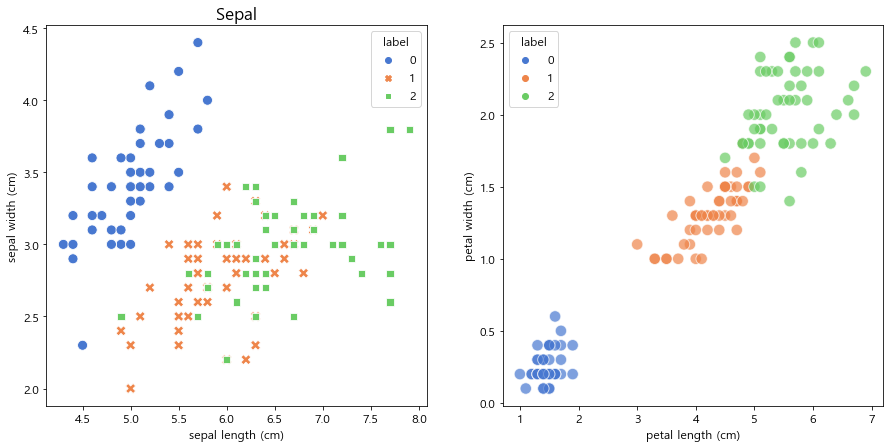

In [19]:
plt.figure(figsize = (15,7))
plt.subplot(121)
sns.scatterplot(x = "sepal length (cm)",
                y = "sepal width (cm)",
                hue='label', # different colors by group
                style='label', # different shapes by group
                s=100, # marker size
                data=iris_df, 
                palette='muted')
plt.title('Sepal', fontsize = 17)

plt.subplot(122)
sns.scatterplot(x = "petal length (cm)",
               y = "petal width (cm)",
               hue = "label",
               s = 130,
               data = iris_df,
               palette = "muted",
               alpha = 0.7)

In [23]:
iris_data = iris.data
iris_label = iris.target
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


In [27]:
iris_df = pd.DataFrame(data = iris_data, columns = iris.feature_names)
iris_df['label'] = iris.target

## train, test set로 분리하기
 - x는 frature
 - y는 target
 X_train, X_test, y_train, y_train = train_test_split(data, label, testsize = float, train_size = float, random_state = value, shuffle = True/False, stratify=y_data)

In [31]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, 
                                                    test_size=0.3, random_state=11, stratify = iris_label)

In [36]:
iris_df.shape, len(X_train), len(X_test)

((150, 5), 105, 45)

** 학습 데이터 세트로 학습(Train) 수행 **

In [38]:
model = DecisionTreeClassifier(random_state=11)

# 학습 수행 
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

** 테스트 데이터 세트로 예측(Predict) 수행 **

In [39]:
pred = model.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9778
